In [1]:
import pandas as pd

df1 = pd.read_csv('monthly_dataset.csv')

df1.head()

,Year,Month,Date,Population (million),Temperature (celsius),CPI,GDP (million bahts),Peak Load (MW),Generation (GWh),Consumption (GWh)
0,2002,Jan,2002-Jan,63.25,26.45,70.23,480343.33,14552.5,8261.93,7326.80
1,2002,Feb,2002-Feb,63.21,26.49,70.23,480343.33,15260.8,8187.95,7359.06
2,2002,Mar,2002-Mar,63.17,26.52,70.23,480343.33,16485.3,9687.11,8471.25
3,2002,Apr,2002-Apr,63.13,26.55,70.23,470404.67,16681.1,9378.36,8461.08
4,2002,May,2002-May,63.09,26.58,70.07,470404.67,16293.1,9654.67,8730.29


In [2]:
df1 = df1.drop(['Year', 'Month', 'Date', 'Generation (GWh)', 'Consumption (GWh)'], axis=1)

df1.head()

,Population (million),Temperature (celsius),CPI,GDP (million bahts),Peak Load (MW)
0,63.25,26.45,70.23,480343.33,14552.5
1,63.21,26.49,70.23,480343.33,15260.8
2,63.17,26.52,70.23,480343.33,16485.3
3,63.13,26.55,70.23,470404.67,16681.1
4,63.09,26.58,70.07,470404.67,16293.1


In [4]:
X1 = df1.drop(['Peak Load (MW)'], axis=1).values
y = df1['Peak Load (MW)'].values

X1.shape, y.shape

((252, 4), (252,))

In [5]:
df2 = pd.read_csv('Assume_features.csv')

df2.head()

,Date,Year,Month,GDP2,GDP3,GDP4,Population005,Population01,Population015,CPI2,CPI3,CPI4,Temperature
0,2023-01,2023,1,925573.3889,926343.4166,927113.4444,66.092754,66.095507,66.098261,106.647450,106.736175,106.824900,26.584549
1,2023-02,2023,2,927116.0112,928659.2752,930203.8226,66.095508,66.101015,66.106524,106.825196,107.003015,107.180983,26.393308
2,2023-03,2023,3,928661.2045,930980.9234,933304.5020,66.098262,66.106524,66.114787,107.003238,107.270523,107.538253,26.543848
3,2023-04,2023,4,930208.9732,933308.3757,936415.5170,66.101016,66.112033,66.123051,107.181577,107.538699,107.896714,26.605915
4,2023-05,2023,5,931759.3215,935641.6466,939536.9020,66.103770,66.117542,66.131317,107.360212,107.807546,108.256370,26.672819


In [6]:
X2_base = df2[['Population005', 'Temperature', 'CPI2', 'GDP2']].values
X2_mid = df2[['Population01', 'Temperature', 'CPI3', 'GDP3']].values
X2_high = df2[['Population015', 'Temperature', 'CPI4', 'GDP4']].values

X2_base.shape, X2_mid.shape, X2_high.shape


((120, 4), (120, 4), (120, 4))

In [7]:
import pickle

scaler = pickle.load(open('monthly_scaler.pkl', 'rb'))

In [8]:
X2_base = scaler.transform(X2_base)
X2_mid = scaler.transform(X2_mid)
X2_high = scaler.transform(X2_high)

In [9]:
X2_base[:5]

array([[ 1.00300243, -0.49940668,  1.48390559,  1.5144528 ],
       [ 1.00483966, -0.84952646,  1.50041562,  1.52589212],
       [ 1.00667697, -0.57392164,  1.51695317,  1.5373505 ],
       [ 1.00851436, -0.46029043,  1.53351828,  1.54882799],
       [ 1.01035182, -0.33780501,  1.550111  ,  1.5603246 ]])

In [10]:
X1 = scaler.transform(X1)
X1[:5]

array([[-0.89353222, -0.74573656, -1.89875305, -1.78715195],
       [-0.9202181 , -0.67250547, -1.89875305, -1.78715195],
       [-0.94690398, -0.61758216, -1.89875305, -1.78715195],
       [-0.97358986, -0.56265884, -1.89875305, -1.86085211],
       [-1.00027574, -0.50773553, -1.91361475, -1.86085211]])

In [11]:
import tensorflow as tf

model = tf.keras.models.load_model('ANN_monthly_peak')

In [17]:
import numpy as np

X_base = np.concatenate((X1, X2_base), axis=0)
X_mid = np.concatenate((X1, X2_mid), axis=0)
X_high = np.concatenate((X1, X2_high), axis=0)

X_base.shape, X_mid.shape, X_high.shape

((372, 4), (372, 4), (372, 4))

In [18]:
y_pred_base = model.predict(X_base)
y_pred_mid = model.predict(X_mid)
y_pred_high = model.predict(X_high)

12/12 [==============================] - 0s 1ms/step


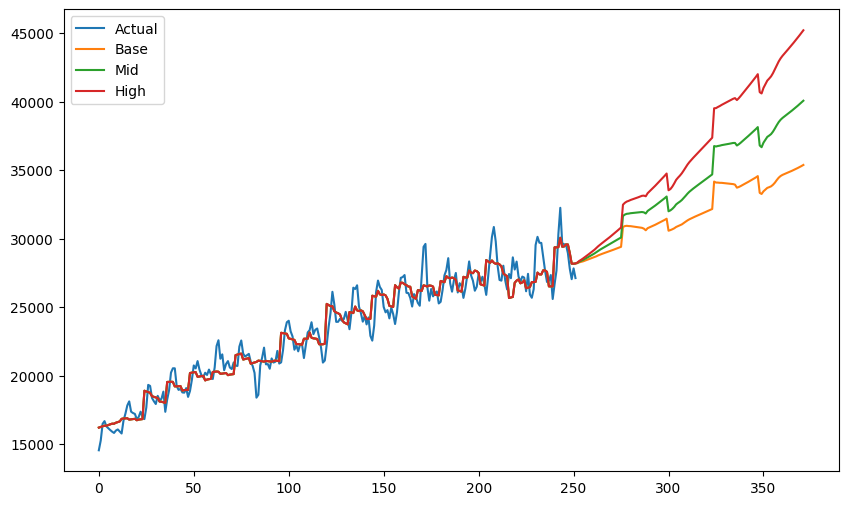

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y, label='Actual')
plt.plot(y_pred_base, label='Base')
plt.plot(y_pred_mid, label='Mid')
plt.plot(y_pred_high, label='High')
plt.legend()
plt.show()